In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = "Resources/test2.csv"

In [3]:
sklearndata = pd.read_csv(data)
print(sklearndata.shape)

(172, 13)


In [ ]:
sklearndata.columns

In [28]:
X = sklearndata[['2015 AID', '2016 AID', '2017 AID', '2018 AID', '2019 AID',
       '2020 AID']].values.reshape(-1,1)
y= sklearndata[['2015 POP', '2016 POP', '2017 POP', '2018 POP', '2019 POP',
       '2020 POP']].values.reshape(-1,1)

print("Shape:", X.shape, y.shape)

Shape: (1032, 1) (1032, 1)


In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
print(model.coef_)
print(model.intercept_)

[[27.77575769]]
[3.70531185e+09]


In [39]:
from sklearn.metrics import mean_squared_error, r2_score

predicted = model.predict(X)

mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(mse)
print(r2)

1.0344112745789614e+21
0.0411108064800475


In [33]:
predictions = model.predict(X)
predictions

array([[4.87590955e+09],
       [5.15389547e+09],
       [5.11692066e+09],
       ...,
       [1.10707411e+10],
       [9.45028597e+09],
       [6.80737130e+09]])

In [34]:
x_min = X.min()
x_max = X.max()

In [35]:
y_min_actual = y.min()
y_max_actual = y.max()

In [37]:
y_min = 3.70531185e+09+ 27.77575769* x_min
y_max =3.70531185e+09+27.77575769* x_max
print(f"Actual Min Value: {y_min_actual}")
print(f"Calculated Min Value: {y_min}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Calculated Max Value: {y_max}")

Actual Min Value: 11225.0
Calculated Min Value: 3550281402.9017496
Actual Max Value: 510000000000.0
Calculated Max Value: 87505901690.8498


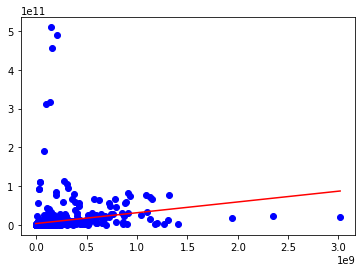

In [38]:
plt.scatter(X, y, c='blue')
plt.plot([x_min, x_max], [y_min, y_max], c='red')

In [25]:
score =model.score(X,y)
score

0.04111080648004751

In [ ]:
y_min_predicted = model.predict([[x_min]])
y_max_predicted = model.predict([[x_max]])
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

predicted = model.predict(X_test)

mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(mse)
print(r2)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [41]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [42]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [43]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

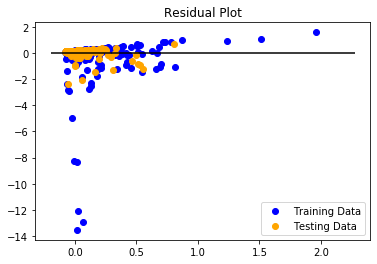

In [44]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

predicted = model.predict(X_test)

mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(mse)
print(r2)


1.970264623027802e+20
-0.11759342760688041
